# Climate Analysis

In [30]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import pandas as pd

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [33]:
engine = create_engine("sqlite:///hawaii.sqlite")
session = Session(engine)

In [34]:
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0, 63),
 (3, 'USC00519397', '2010-01-03', 0, 74),
 (4, 'USC00519397', '2010-01-04', 0, 76),
 (5, 'USC00519397', '2010-01-06', None, 73)]

In [35]:
engine.execute('SELECT * FROM stations LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [36]:
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp INTEGER
tobs INTEGER


In [37]:
inspector = inspect(engine)
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [38]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
measurements = Base.classes.measurements

# Precipitation Analysis

In [56]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
### BEGIN SOLUTION
sel = [measurements.date, 
       measurements.prcp]
percip = session.query(*sel).\
    filter(func.strftime("%Y", measurements.date) == "2016").\
    group_by(measurements.prcp).\
    order_by(measurements.date).all()

<IPython.core.display.Javascript object>


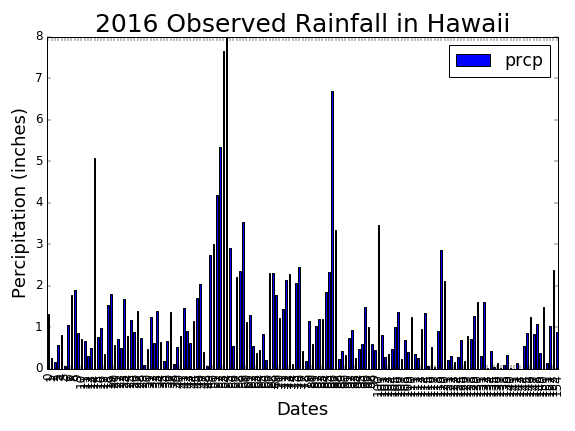

In [57]:
# Plot the Results
### BEGIN SOLUTION

plt.style.use('classic')

df = pd.DataFrame(percip, columns=['date', 'prcp'])
df.set_index('date')#, inplace=True)
df.plot.bar()
plt.tight_layout()
plt.xlabel('Dates',fontsize=(18))
plt.ylabel('Percipitation (inches)',fontsize=(18));
plt.title('2016 Observed Rainfall in Hawaii',fontsize=(25));

plt.legend(fontsize='x-large')
plt.ylim(0,8)
plt.tight_layout()
plt.show()
### END SOLUTION



# Station Analyis

In [60]:
format(session.query(stations.station).count())

'9'

In [51]:
tobs = session.query(measurements.tobs, measurements.station).\
    filter(measurements.date > '2016-08-23').\
    order_by(measurements.tobs).all()


tobs_df = pd.DataFrame(tobs)

tobs_df["station"].value_counts()

USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
Name: station, dtype: int64

In [53]:
#use this value count number to filter the correct dataset

#Find Precipitation Data from the Last 12 months
tobs1 = session.query(measurements.tobs, measurements.station).\
    filter(measurements.date > '2016-08-23').\
    filter(measurements.station == 'USC00519397').\
    order_by(measurements.tobs).all()

In [68]:
df = pd.DataFrame(tobs, columns=['Tobs'])
#df.set_index('Station')#, inplace=True)
df['Station'].hist(by=df['Tobs'])
plt.show()

AssertionError: 1 columns passed, passed data had 2 columns

In [61]:
tobs1

[(60, 'USC00519397'),
 (61, 'USC00519397'),
 (61, 'USC00519397'),
 (62, 'USC00519397'),
 (62, 'USC00519397'),
 (62, 'USC00519397'),
 (62, 'USC00519397'),
 (63, 'USC00519397'),
 (63, 'USC00519397'),
 (63, 'USC00519397'),
 (63, 'USC00519397'),
 (64, 'USC00519397'),
 (64, 'USC00519397'),
 (64, 'USC00519397'),
 (64, 'USC00519397'),
 (64, 'USC00519397'),
 (65, 'USC00519397'),
 (65, 'USC00519397'),
 (65, 'USC00519397'),
 (65, 'USC00519397'),
 (66, 'USC00519397'),
 (66, 'USC00519397'),
 (66, 'USC00519397'),
 (66, 'USC00519397'),
 (66, 'USC00519397'),
 (66, 'USC00519397'),
 (66, 'USC00519397'),
 (66, 'USC00519397'),
 (67, 'USC00519397'),
 (67, 'USC00519397'),
 (67, 'USC00519397'),
 (67, 'USC00519397'),
 (67, 'USC00519397'),
 (67, 'USC00519397'),
 (67, 'USC00519397'),
 (68, 'USC00519397'),
 (68, 'USC00519397'),
 (68, 'USC00519397'),
 (68, 'USC00519397'),
 (68, 'USC00519397'),
 (68, 'USC00519397'),
 (68, 'USC00519397'),
 (69, 'USC00519397'),
 (69, 'USC00519397'),
 (69, 'USC00519397'),
 (69, 'USC

In [41]:
import datetime as dt
import numpy as np

date = dt.datetime(2011, 5, 31)

# Design a query to calculate the total number of stations.

Design a query to find the most active stations.

List the stations and observation counts in descending order

Which station has the highest number of observations?

Design a query to retrieve the last 12 months of temperature observation data (tobs).

Filter by the station with the highest number of observations.

Plot the results as a histogram with bins=12.

In [42]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
### BEGIN SOLUTION
sel = [measurements.station, 
       measurements.tobs]
stats_query = session.query(*sel).\
    filter(func.strftime("%Y", measurements.tobs) == "2016").\
    group_by(measurements.station)
    
### END SOLUTION


In [43]:
sel = [.dat, 
       measurements.prcp]
may_averages = session.query(*sel).\
    filter(func.strftime("%Y", measurements.date) == "2016").\
    group_by(measurements.prcp).\
    order_by(measurements.date).all()
### END SOLUTION
may_averages

SyntaxError: invalid syntax (<ipython-input-43-a0b3c17cc63f>, line 1)

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).\
        filter(measurements.date >= start_date).filter(measurements.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Load the query into a dataframe, set the index to the date, and plot the ptps
### BEGIN SOLUTION
import numpy as np

fig, ax = plt.subplots()

x = range(len(calc_temps))
ax.boxplot(calc_temps, patch_artist=True)
ax.set_title('Trip AVG Temp')
fig.tight_layout()
fig.show()
### END SOLUTION